In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255 # 데이터 정규화
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
y_train = np_utils.to_categorical(y_train) # 원핫인코딩
y_test = np_utils.to_categorical(y_test)

# 컨볼루션 신경망 설정

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화 설정

In [6]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.05190, saving model to ./model\01-0.0519.hdf5

Epoch 2: val_loss improved from 0.05190 to 0.03959, saving model to ./model\02-0.0396.hdf5

Epoch 3: val_loss improved from 0.03959 to 0.03812, saving model to ./model\03-0.0381.hdf5

Epoch 4: val_loss improved from 0.03812 to 0.02923, saving model to ./model\04-0.0292.hdf5

Epoch 5: val_loss did not improve from 0.02923

Epoch 6: val_loss improved from 0.02923 to 0.02895, saving model to ./model\06-0.0289.hdf5

Epoch 7: val_loss improved from 0.02895 to 0.02821, saving model to ./model\07-0.0282.hdf5

Epoch 8: val_loss did not improve from 0.02821

Epoch 9: val_loss did not improve from 0.02821

Epoch 10: val_loss did not improve from 0.02821

Epoch 11: val_loss did not improve from 0.02821

Epoch 12: val_loss did not improve from 0.02821

Epoch 13: val_loss did not improve from 0.02821

Epoch 14: val_loss did not improve from 0.02821

Epoch 15: val_loss did not improve from 0.02821

Epoch 16: val

In [8]:
# 테스트 정확도 출력

print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0318 - accuracy: 0.9926

 Test Accuracy: 0.9926


In [9]:
# 테스트 셋의 오차

y_vloss = history.history['val_loss']

# 학습셋의 오차

y_loss = history.history['loss']

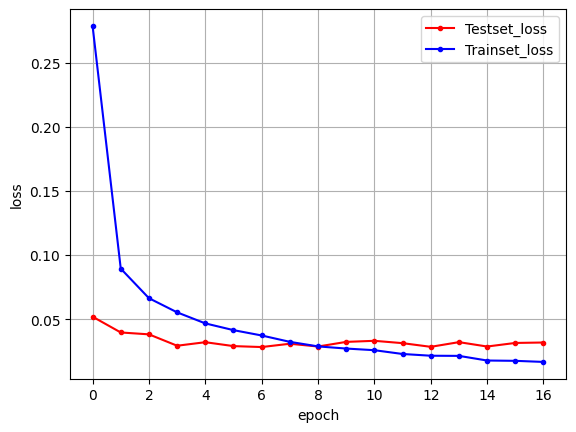

In [10]:
# 그래프로 표현

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()